In [1]:
___Author___='LumberJack Jyss'

In [2]:
print('Global Optimized LumberJack Equities Method\n°OoO_FOREX_Oo0°\nLumberJack Jyss 5779(c)')

Global Optimized LumberJack Equities Method
°OoO_FOREX_Oo0°
LumberJack Jyss 5779(c)


In [3]:
print('Importing librairies...')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Dense
print('Librairies imported')

Importing librairies...
Librairies imported


Using TensorFlow backend.


In [4]:
tf.logging.set_verbosity(tf.logging.ERROR)

In [5]:
start = '2014-01-28'
end = '2019-05-24'

In [6]:
vix = pd.read_csv('vix_5Y.csv')

In [7]:
gbpusd = pd.read_csv('gbpusd_5Y.csv')

In [117]:
vix.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,20140527,11.69,11.84,11.50,11.51,0
1,1,20140528,11.60,11.86,11.50,11.68,0
2,2,20140529,11.58,11.82,11.41,11.57,0
3,3,20140530,11.66,11.70,11.32,11.40,0
4,4,20140602,11.69,12.17,11.29,11.58,0


In [118]:
gbpusd.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,20140529,1.67110,1.67409,1.669310,1.671700,-1
1,1,20140530,1.67170,1.67777,1.671490,1.675225,-1
2,2,20140602,1.67655,1.67670,1.672515,1.674585,-1
3,3,20140603,1.67474,1.67828,1.673090,1.674890,-1
4,4,20140604,1.67493,1.67687,1.669900,1.673710,-1


In [133]:
temporary_df = pd.DataFrame()
date_list = []
open_list = []
vix_list = []
close_list = []
for i in range(0,vix.shape[0]-1):
    for b in range(0,gbpusd.shape[0]-1):
        if vix.iloc[i,1] == gbpusd.iloc[b,1]:
            date_list.append(vix.iloc[i,1])
            open_list.append(gbpusd.iloc[b,2])
            vix_list.append(vix.iloc[i,5])
            close_list.append(gbpusd.iloc[b,5])
temporary_df['Date'] = date_list
temporary_df['Open'] = open_list
temporary_df['Vix'] = vix_list
temporary_df['Close'] = close_list


In [138]:
temporary_df.head()

,Date,Open,Vix,Close
0,20140529,1.67110,11.57,1.671700
1,20140530,1.67170,11.40,1.675225
2,20140602,1.67655,11.58,1.674585
3,20140603,1.67474,11.87,1.674890
4,20140604,1.67493,12.08,1.673710


In [151]:
temporary_df.to_csv('df.csv')

In [127]:
df = pd.read_csv('df.csv')
df = df.iloc[:,1:]
df.head()

,Date,Open,Vix,Close
0,20140529,1.67110,11.57,1.671700
1,20140530,1.67170,11.40,1.675225
2,20140602,1.67655,11.58,1.674585
3,20140603,1.67474,11.87,1.674890
4,20140604,1.67493,12.08,1.673710


In [128]:
df.isnull().sum().sum()

0

In [129]:
df.describe()

,Date,Open,Vix,Close
count,1.256000e+03,1256.000000,1256.000000,1256.000000
mean,2.016462e+07,1.402531,14.998408,1.402254
std,1.485952e+04,0.131250,4.309386,0.131071
min,2.014053e+07,1.204450,9.140000,1.212190
25%,2.015083e+07,1.297524,12.090000,1.297390
50%,2.016112e+07,1.347732,13.805000,1.347703
75%,2.018022e+07,1.518075,16.692500,1.518121
max,2.019052e+07,1.716480,40.740000,1.716560


In [130]:
delta = round(df.shape[0])
bloc1 = round(delta*0.8)
bloc2 = delta - bloc1
print("Période d'étude : ",delta)
print('Sur un découpage 80% - 20% de la période : ')
print('Bloc 1 : ',bloc1,' jours \nBloc 2 :',bloc2,' jours')

Période d'étude :  1256
Sur un découpage 80% - 20% de la période : 
Bloc 1 :  1005  jours 
Bloc 2 : 251  jours


In [131]:
dataset = df.copy()
dataset['Vix'] = dataset['Vix'].shift(1)
dataset = dataset.iloc[1:,:]
dataset.reset_index(inplace=True,drop=True)
dataset.head()

,Date,Open,Vix,Close
0,20140530,1.67170,11.57,1.675225
1,20140602,1.67655,11.40,1.674585
2,20140603,1.67474,11.58,1.674890
3,20140604,1.67493,11.87,1.673710
4,20140605,1.67374,12.08,1.682035


In [132]:
dataset.tail()

,Date,Open,Vix,Close
1250,20190517,1.279750,15.29,1.271960
1251,20190520,1.273650,15.96,1.272265
1252,20190521,1.273500,16.31,1.270550
1253,20190522,1.270675,14.95,1.266325
1254,20190523,1.266100,14.75,1.265715


In [133]:
dataset.shape

(1255, 4)

In [134]:
# convert into input/output
X1 = dataset['Open'].values.reshape(len(dataset),1)
X2 = dataset['Vix'].values.reshape(len(dataset),1)
y = dataset['Close'].values.reshape(len(dataset),1)

#scaler = MinMaxScaler()
#X1 = scaler.fit_transform(X1)
#X2 = scaler.fit_transform(X2)

X1_train = X1[:bloc1]
X1_test = X1[bloc1:]

X2_train = X2[:bloc1]
X2_test = X2[bloc1:]

y_train = y[:bloc1]
y_test = y[bloc1:]


In [135]:
X_train = np.concatenate((X1_train,X2_train),axis=1)
X_test = np.concatenate((X1_test,X2_test),axis=1)

In [136]:
# first input model
model = Sequential()
model.add(Dense(50, activation='relu', input_dim=2))
#model.add(Dense(30, activation='relu', input_dim=2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [149]:
# fit model
history = model.fit(x=X_train, y=y_train, batch_size=32, epochs=100, verbose=1,shuffle=True,validation_split=.2)

Train on 804 samples, validate on 201 samples
Epoch 1/100
804/804 [==============================] - 0s 32us/step - loss: 1.2023e-04 - val_loss: 4.6468e-05
Epoch 2/100
804/804 [==============================] - 0s 32us/step - loss: 8.7584e-05 - val_loss: 4.4761e-05
Epoch 3/100
804/804 [==============================] - 0s 31us/step - loss: 8.5366e-05 - val_loss: 4.5792e-05
Epoch 4/100
804/804 [==============================] - 0s 33us/step - loss: 8.4669e-05 - val_loss: 4.4568e-05
Epoch 5/100
804/804 [==============================] - 0s 34us/step - loss: 8.7373e-05 - val_loss: 4.6918e-05
Epoch 6/100
804/804 [==============================] - 0s 32us/step - loss: 8.6327e-05 - val_loss: 5.3028e-05
Epoch 7/100
804/804 [==============================] - 0s 30us/step - loss: 8.6920e-05 - val_loss: 4.9120e-05
Epoch 8/100
804/804 [==============================] - 0s 31us/step - loss: 8.4186e-05 - val_loss: 4.4580e-05
Epoch 9/100
804/804 [==============================] - 0s 30us/step - loss

In [150]:
model.save('GBPUSDclean.h5')

In [151]:
df.head()

,Date,Open,Vix,Close
0,20140529,1.67110,11.57,1.671700
1,20140530,1.67170,11.40,1.675225
2,20140602,1.67655,11.58,1.674585
3,20140603,1.67474,11.87,1.674890
4,20140604,1.67493,12.08,1.673710


In [152]:
# demonstrate prediction
x_input = np.array([[df.iloc[-1,1],df.iloc[-1,2]]])
yhat = model.predict(x_input, verbose=1)
print(yhat,'versus', df.iloc[-1,3])
error = ((df.iloc[-1,-1] - yhat)/df.iloc[-1,-1])*100
print('Error : ',abs(error[0][0]),'%')

1/1 [==============================] - 0s 668us/step
[[1.2660155]] versus 1.265715
Error :  0.023743626 %


In [153]:
print('Initializing \b Processing')
yhat = model.predict(X_test, verbose=1)
print('All processed')

Initializing Processing
250/250 [==============================] - 0s 18us/step
All processed


In [154]:
len(df),len(yhat)

(1256, 250)

In [155]:
date = df['Date']
date.reset_index(inplace=True,drop=True)
resultats = date
resultats = resultats.iloc[-250:]
resultats.reset_index(inplace=True,drop=True)

In [156]:
pred = pd.DataFrame()
pred['Open'] = dataset.iloc[bloc1:,1]
pred['Vix'] = dataset.iloc[bloc1:,2]
pred['Close'] = dataset.iloc[bloc1:,3]
pred['Predictions'] = yhat.reshape(250,)
pred.reset_index(inplace=True,drop=True)
resultats = pd.concat((date,pred),axis=1)
resultats = resultats.iloc[:250,:]
resultats['% Error'] = ((resultats.iloc[:,3].values-resultats.iloc[:,4])/resultats.iloc[:,4])*100

In [157]:
resultats.tail()

,Date,Open,Vix,Close,Predictions,% Error
245,20150519,1.279750,15.29,1.271960,1.279765,-0.609906
246,20150520,1.273650,15.96,1.272265,1.273626,-0.106839
247,20150521,1.273500,16.31,1.270550,1.273446,-0.227421
248,20150522,1.270675,14.95,1.266325,1.270746,-0.347924
249,20150526,1.266100,14.75,1.265715,1.266202,-0.038459


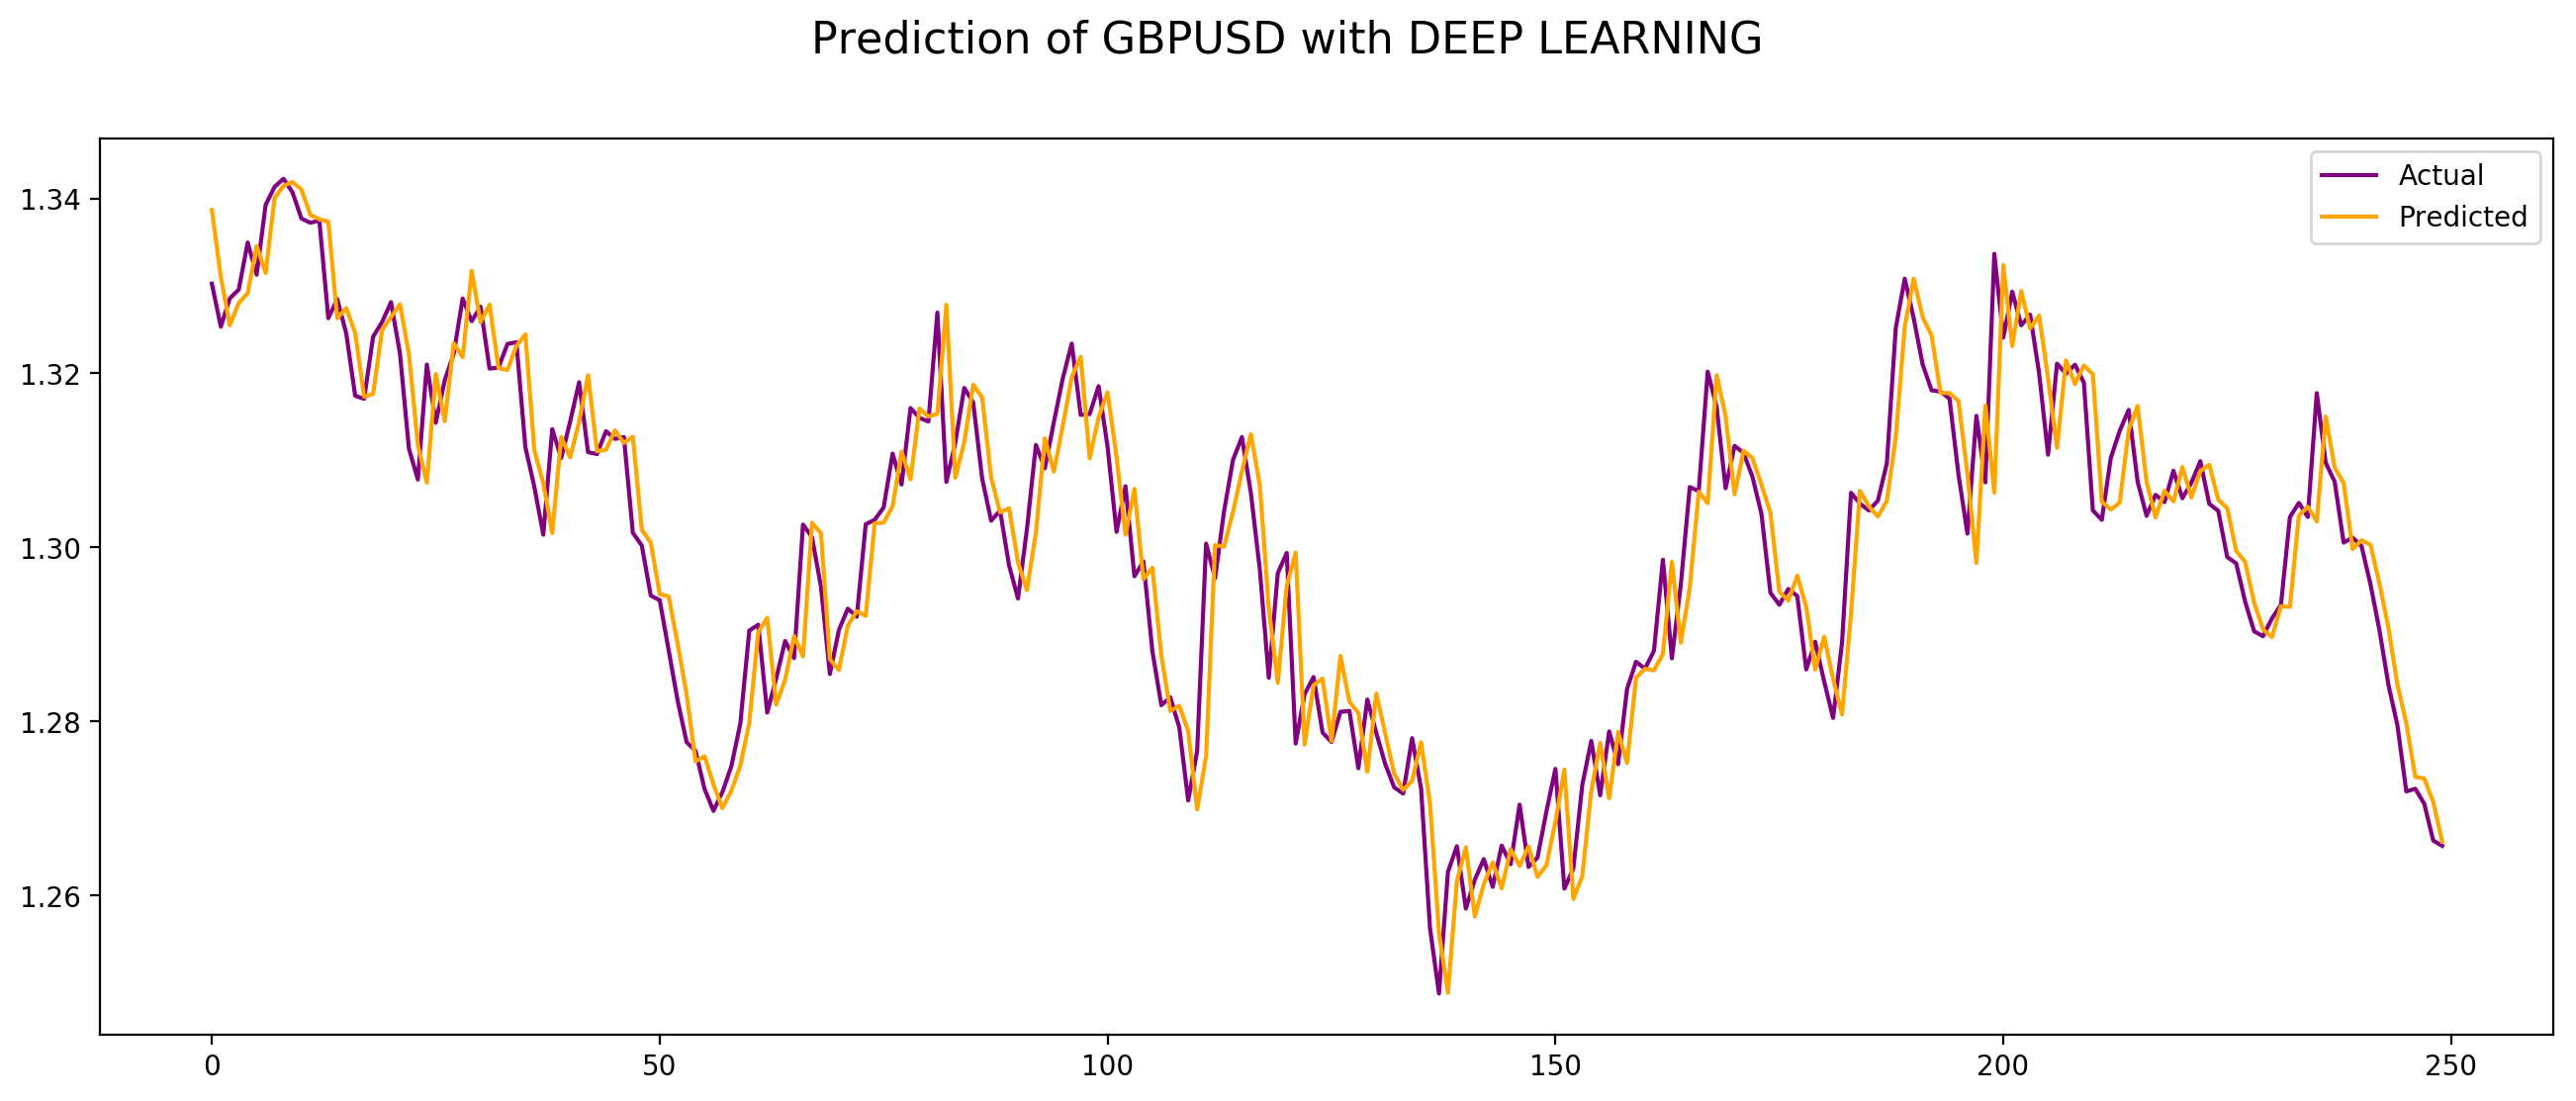

In [158]:
plt.figure(figsize=(16,6),dpi=200)
plt.suptitle('Prediction of GBPUSD with DEEP LEARNING',fontsize=16)
plt.plot(resultats['Close'],color='purple',label='Actual')
plt.plot(resultats['Predictions'],color='orange',label='Predicted')
plt.legend()
plt.show()

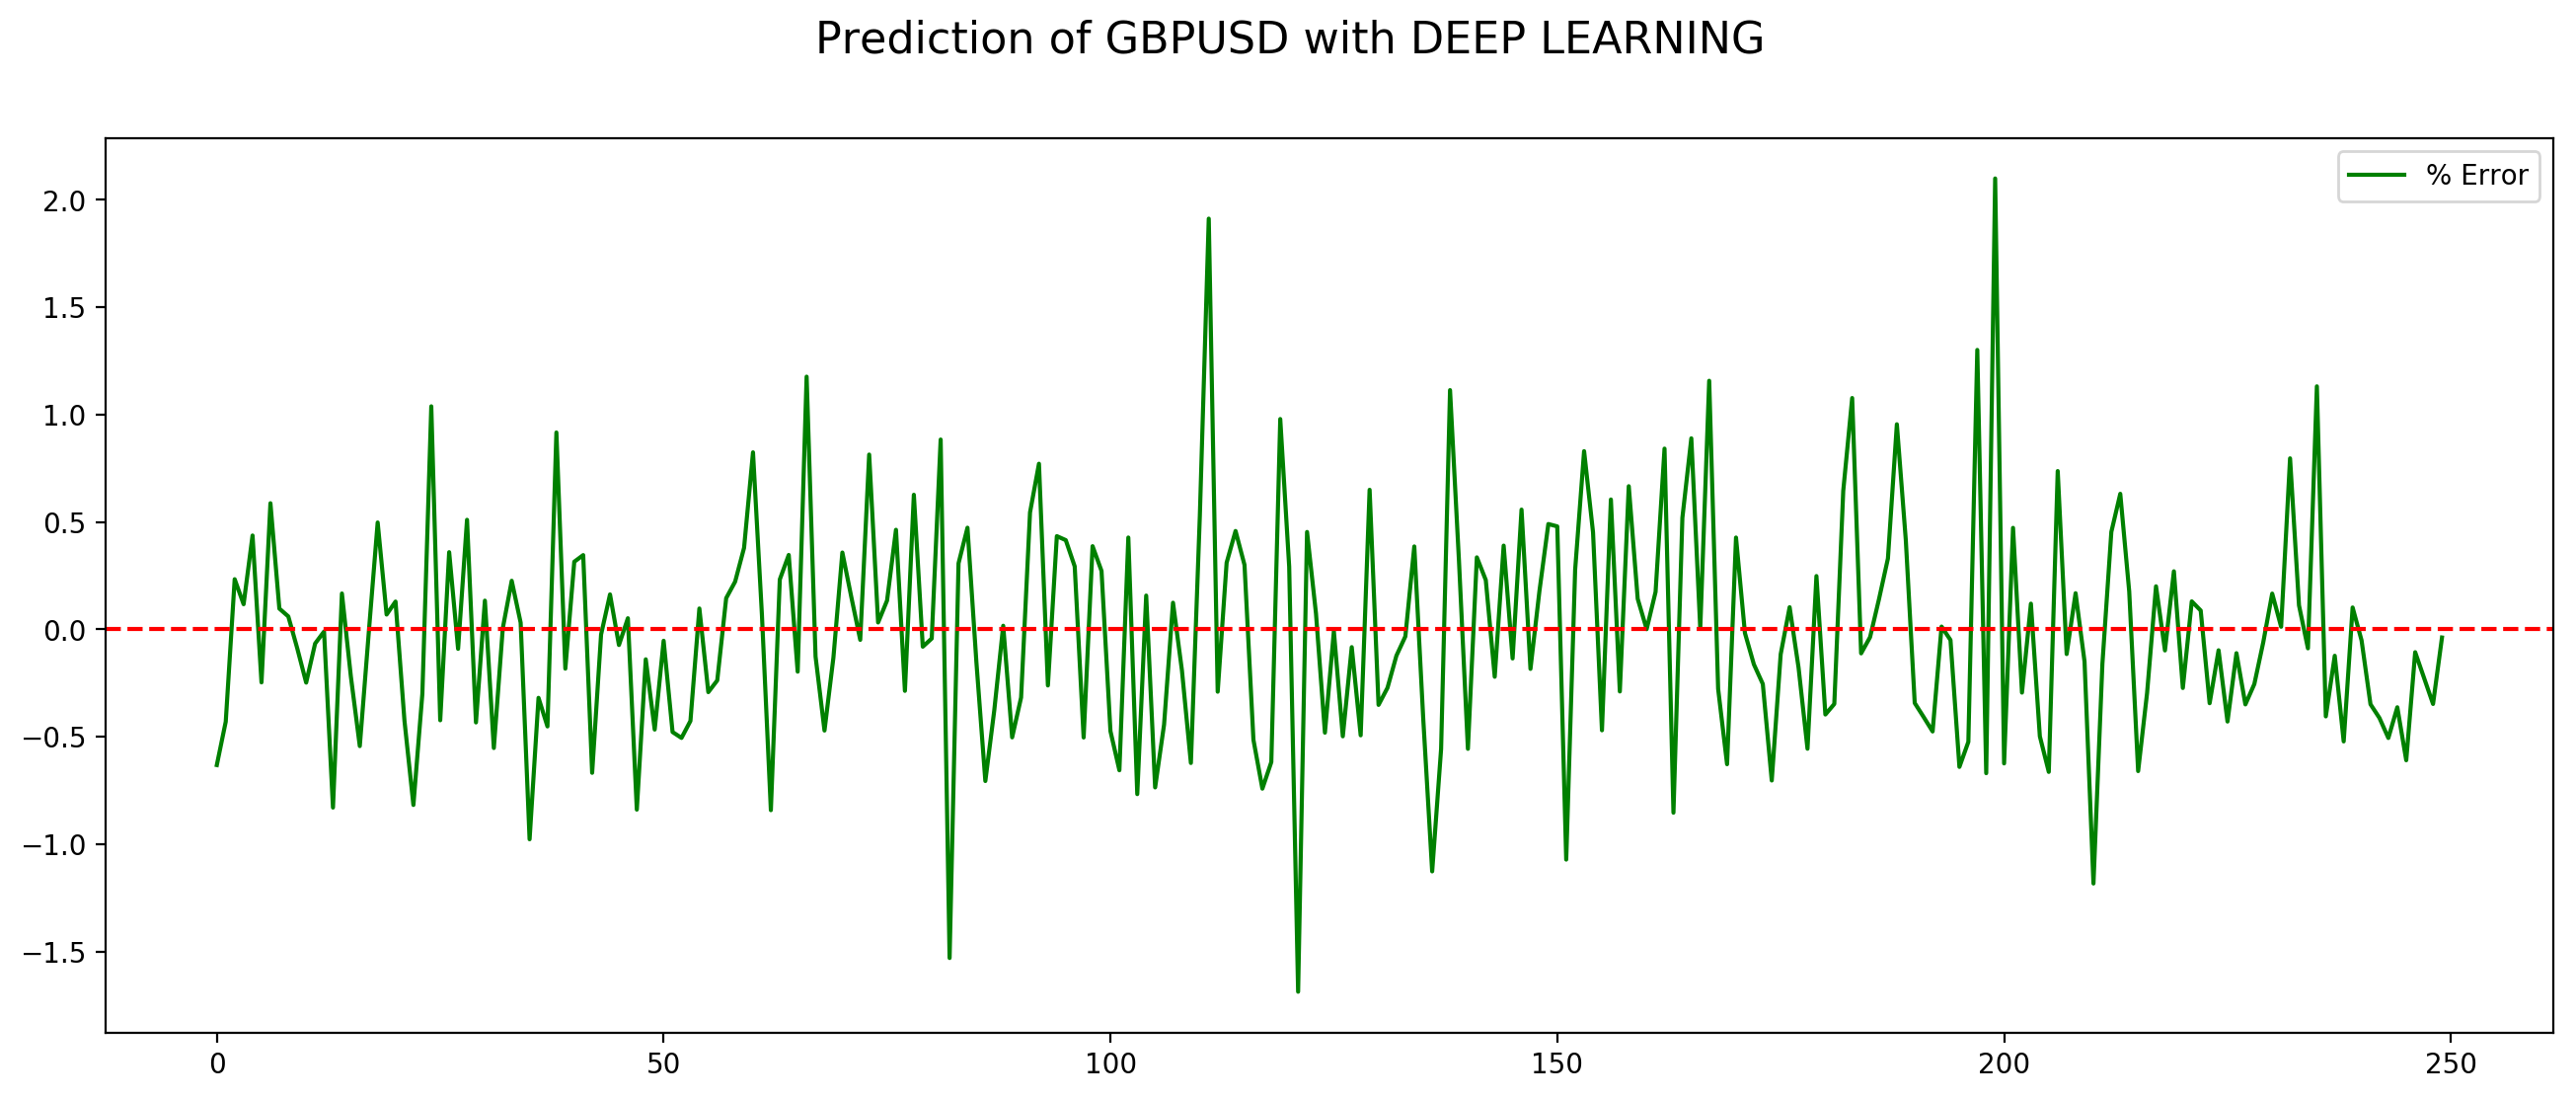

In [159]:
plt.figure(figsize=(16,6),dpi=200)
plt.suptitle('Prediction of GBPUSD with DEEP LEARNING',fontsize=16)
plt.plot(resultats['% Error'],color='g',label='% Error')
plt.axhline(y=0,linestyle='--',color='r')
plt.legend()
plt.show()

In [160]:
gbpusd.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
1289,1289,20190521,1.273500,1.281485,1.268530,1.270550,-1
1290,1290,20190522,1.270675,1.271965,1.262430,1.266325,-1
1291,1291,20190523,1.266100,1.268395,1.260520,1.265715,-1
1292,1292,20190524,1.266450,1.273305,1.264745,1.271330,-1
1293,1293,20190527,1.270975,1.274800,1.267330,1.269215,-1


In [161]:
vix.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
1254,1254,20190520,15.88,17.63,15.46,16.31,0
1255,1255,20190521,15.86,16.22,14.79,14.95,0
1256,1256,20190522,15.06,15.44,14.42,14.75,0
1257,1257,20190523,15.93,18.05,15.28,16.92,0
1258,1258,20190524,16.34,16.52,15.52,15.85,0


In [162]:
yhat = model.predict(np.array([[1.27211,15.85]]), verbose=1)

1/1 [==============================] - 0s 532us/step


In [163]:
yhat

array([[1.2720997]], dtype=float32)

In [164]:
model.test_on_batch(X_test, y_test)
model.metrics_names

['loss']

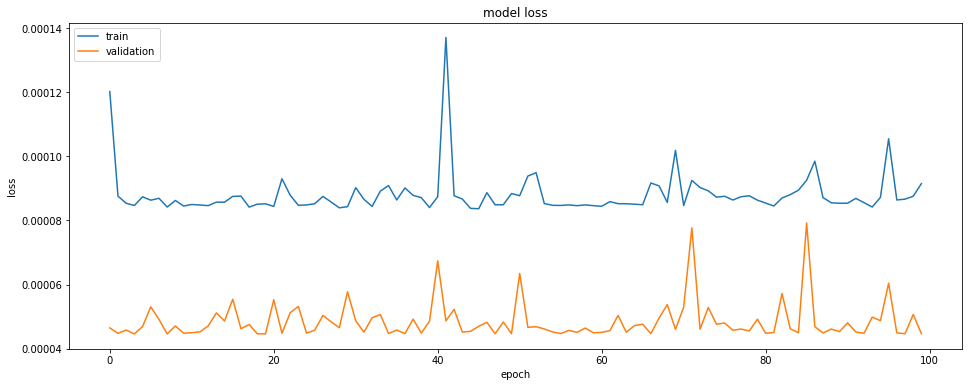

In [166]:
plt.figure(figsize=(16,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()